In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/content/spambase_v6 .csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   object 
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4601 non-null   object 
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   object 
 7   word_freq_internet          4586 non-null   object 
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
# Identify object-type columns
obj_cols = data.select_dtypes(include=['object']).columns

# Convert object columns to numeric
for col in obj_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [5]:
data.isna().sum()

,0
word_freq_make,0
word_freq_address,1
word_freq_all,6
word_freq_3d,2
word_freq_our,1
word_freq_over,1
word_freq_remove,1
word_freq_internet,16
word_freq_order,0
word_freq_mail,0


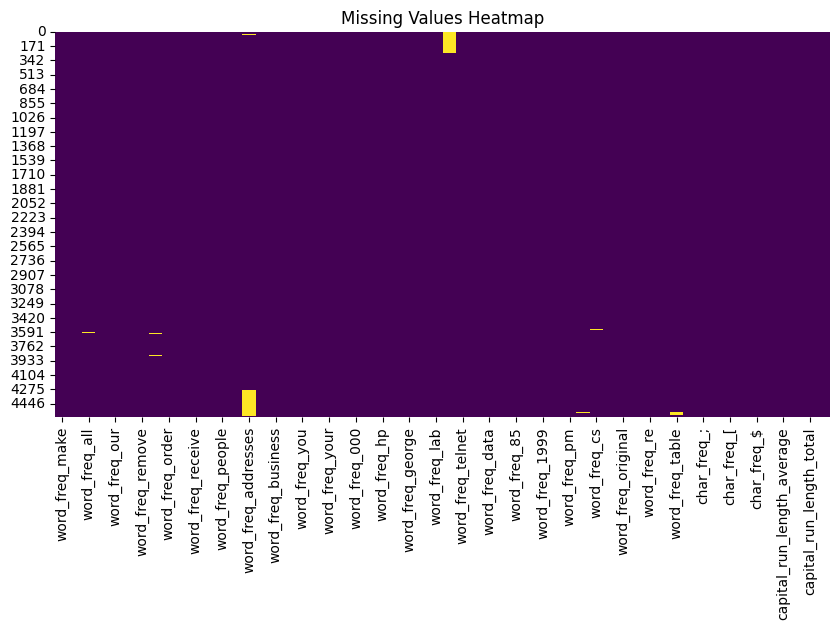

In [6]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
data = data.dropna()

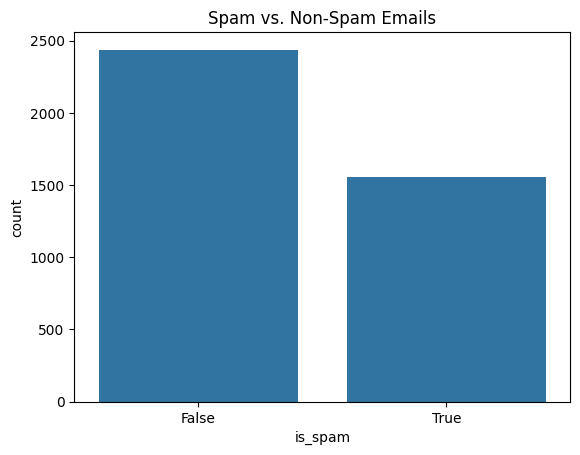

In [8]:
# Check class distribution
sns.countplot(x=data['is_spam'])
plt.title("Spam vs. Non-Spam Emails")
plt.show()

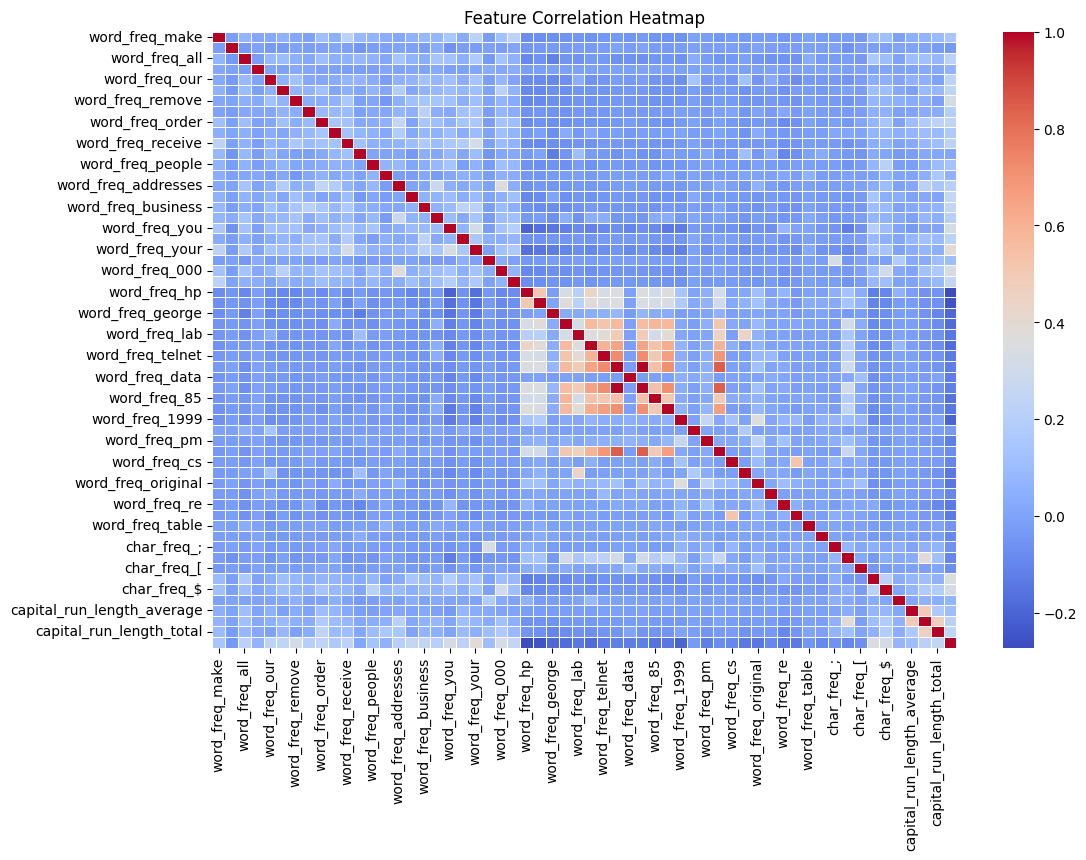

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

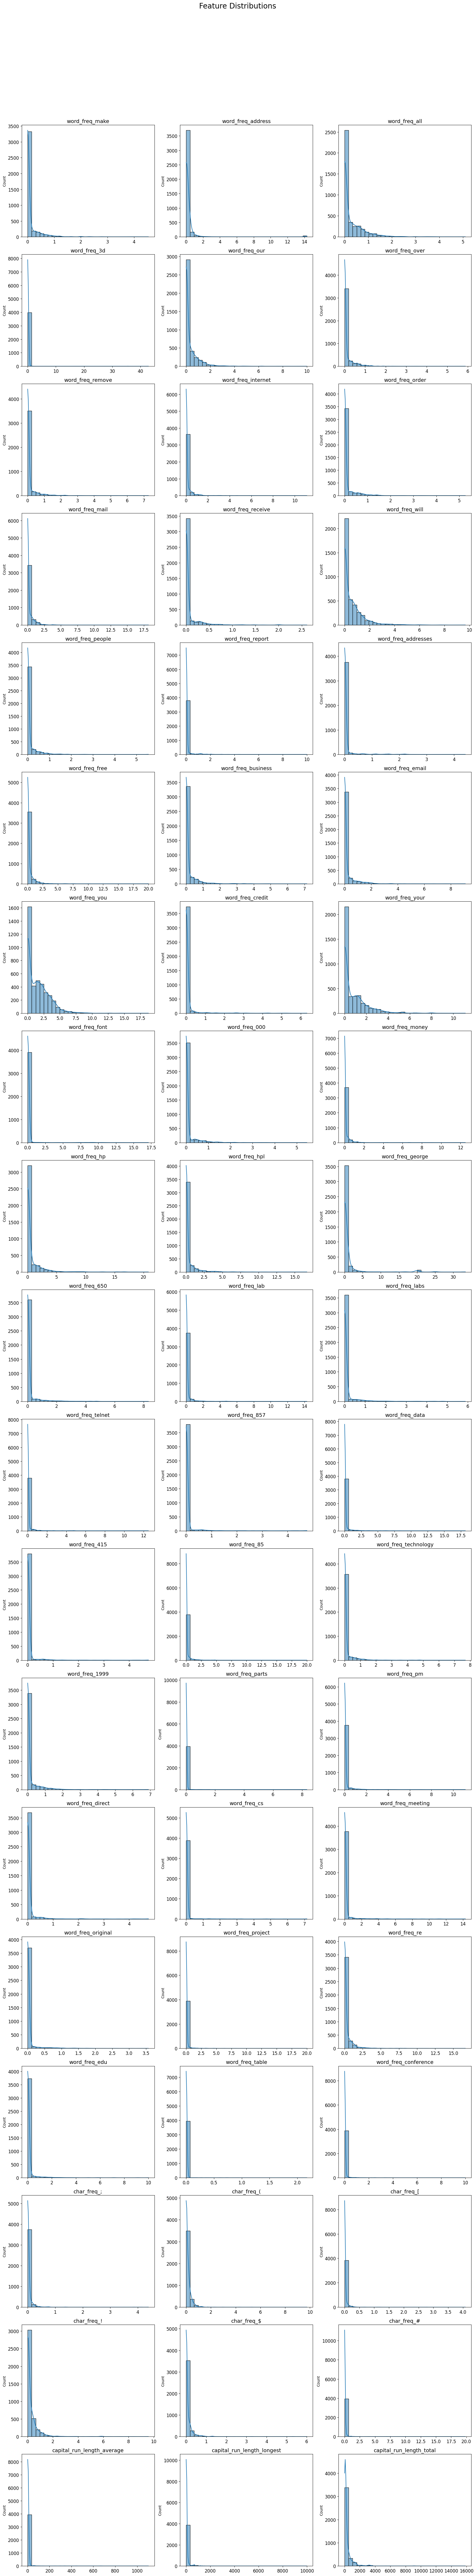

In [10]:
# Define number of rows and columns for subplots
num_features = data.shape[1] - 1  # Excluding 'is_spam'
num_cols = 3  # Reduce columns for larger individual plots
num_rows = -(-num_features // num_cols)  # Ceiling division

# Create larger subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))  # Increased figure size
fig.suptitle("Feature Distributions", fontsize=20, y=1.02)  # Adjust title position
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each feature in a separate subplot
for i, col in enumerate(data.drop(columns=['is_spam']).columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(col, fontsize=14)  # Larger title font
    axes[i].set_xlabel("")  # Remove x-label clutter
    axes[i].tick_params(axis='both', labelsize=12)  # Increase tick size

# Remove unused empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout
plt.show()

In [11]:
# Separate features and target
X = data.drop(columns=['is_spam'])
y = data['is_spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9336670838548186
Confusion Matrix:
 [[470  18]
 [ 35 276]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.96      0.95       488
        True       0.94      0.89      0.91       311

    accuracy                           0.93       799
   macro avg       0.93      0.93      0.93       799
weighted avg       0.93      0.93      0.93       799



In [13]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.951188986232791
Confusion Matrix:
 [[476  12]
 [ 27 284]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       488
        True       0.96      0.91      0.94       311

    accuracy                           0.95       799
   macro avg       0.95      0.94      0.95       799
weighted avg       0.95      0.95      0.95       799



In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [15]:
# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Testing Accuracy: 0.951188986232791
Testing Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       488
        True       0.96      0.91      0.94       311

    accuracy                           0.95       799
   macro avg       0.95      0.94      0.95       799
weighted avg       0.95      0.95      0.95       799



In [16]:
# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_train)

print("Tuned Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_best_rf))
print("Training Classification Report:\n", classification_report(y_train, y_pred_best_rf))


Tuned Random Forest Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1950
        True       1.00      1.00      1.00      1242

    accuracy                           1.00      3192
   macro avg       1.00      1.00      1.00      3192
weighted avg       1.00      1.00      1.00      3192



In [17]:
# Install Git if not installed
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [18]:
# Set up Git credentials (you can skip this step if already configured)
!git config --global user.email "2020320@student.cct.ie"
!git config --global user.name "CASS1029-@n"

# Clone the repo
!git clone https://github.com/Carlos-S320/Spam_Project.git

Cloning into 'Spam_Project'...


In [19]:
import os
os.chdir("Spam_Project")  # Change directory to the cloned repo